In [19]:
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


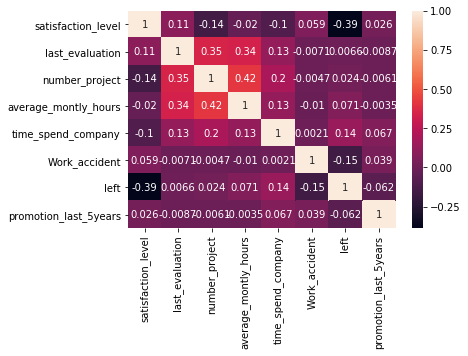

In [6]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

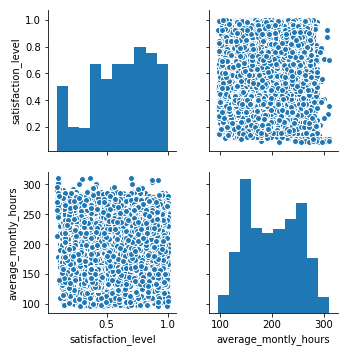

In [7]:
sns.pairplot(data, vars=['satisfaction_level', 'average_montly_hours'])

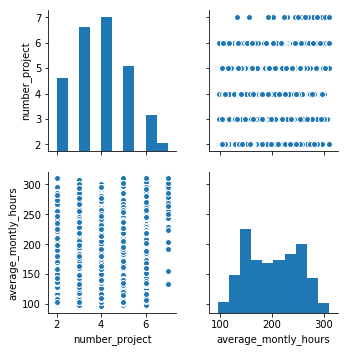

In [8]:
sns.pairplot(data, vars=['number_project', 'average_montly_hours'])

In [10]:
dep_1 = data[data['sales'] == 'sales']['satisfaction_level']
dep_2 = data[data['sales'] == 'hr']['satisfaction_level']

stats.ttest_ind(dep_1, dep_2)

Ttest_indResult(statistic=1.5669709868711348, pvalue=0.11718635016277235)

In [60]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
dep_1 = data[data['sales'] == 'accounting']['satisfaction_level']
dep_2 = data[data['sales'] == 'management']['satisfaction_level']

stats.ttest_ind(dep_1, dep_2)

Ttest_indResult(statistic=-2.997254948084573, pvalue=0.002772376893987989)

In [15]:
dep_1 = data[data['sales'] == 'accounting']['average_montly_hours']
dep_2 = data[data['sales'] == 'management']['average_montly_hours']

stats.ttest_ind(dep_1, dep_2)

Ttest_indResult(statistic=-0.03242394439906676, pvalue=0.9741386059762428)

In [17]:
data.groupby('sales').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [74]:
data_1 = data.groupby('salary').count().reset_index()[['salary','satisfaction_level']]
data_1.head

<bound method NDFrame.head of    salary  satisfaction_level
0    high                1237
1     low                7316
2  medium                6446>

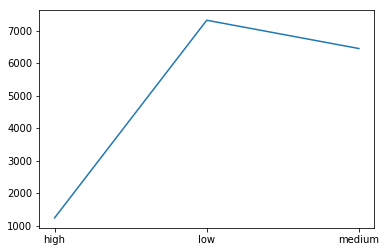

In [82]:
plt.plot(data_1['salary'],data_1['satisfaction_level'])

In [102]:
data_2 = data.groupby(['salary','sales']).count().reset_index()[['salary','sales','satisfaction_level']]
data_2.head(15)

,salary,sales,satisfaction_level
0,high,IT,83
1,high,RandD,51
2,high,accounting,74
3,high,hr,45
4,high,management,225
5,high,marketing,80
6,high,product_mng,68
7,high,sales,269
8,high,support,141
9,high,technical,201


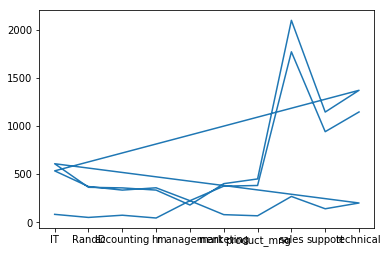

In [107]:
plt.plot(data_2['sales'],data_2['satisfaction_level'])

In [80]:
data[data['left']==1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64

In [123]:
#гипотеза 1: сотрудники покидают компанию потому, что у них разный уровень удовлетворенности работой

sal_1 = data[data['left'] == 0]['satisfaction_level']
sal_2 = data[data['left'] == 1]['satisfaction_level']

stats.ttest_ind(sal_1, sal_2)
# гипотеза подтверждается уровень удовлетворенности у людей, покинувших компанию, статистически ниже

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [126]:
# гипотеза 2: среднее количество рабочего времени у покинувших работу болы больше, они были переутомлены
sal_1 = data[data['left'] == 0]['average_montly_hours']
sal_2 = data[data['left'] == 1]['average_montly_hours']

stats.ttest_ind(sal_1, sal_2)
#гипотеза подтверждается

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)